In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [3]:
!pip install sklearn

Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
    Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'


# reading data

In [50]:
data=pd.read_csv('Kaggle/covid_19_india.csv')
data=data[['Sno','Confirmedcases']]
print('-'*30);print('HEAD');print('-'*30)
print(data.head())

------------------------------
HEAD
------------------------------
   Sno  Confirmedcases
0    1               1
1    2               1
2    3               2
3    4               3
4    5               3


# Prepare data

------------------------------
PREPARE DATA
------------------------------


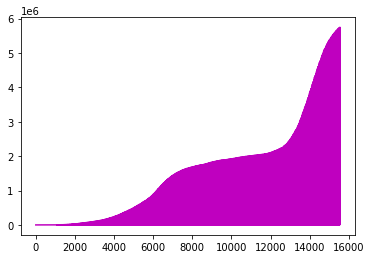

In [52]:
print('-'*30);print('PREPARE DATA');print('-'*30)

x = np.array(data['Sno']).reshape(-1, 1)
y = np.array(data['Confirmedcases']).reshape(-1, 1)
plt.plot(y,'-m')
plt.show()


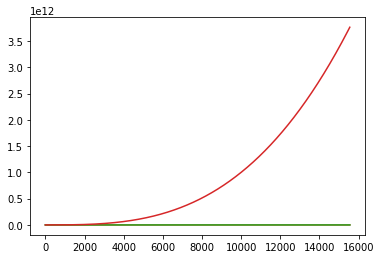

In [53]:
polyFeat = PolynomialFeatures(degree=3)
x=polyFeat.fit_transform(x)
#print(x)
plt.plot(x)
plt.show()

# Training DATA

In [54]:
print('-'*30);print('PREPARE DATA');print('-'*30)
model=linear_model.LinearRegression()
model.fit(x,y)
accuracy=model.score(x,y)
print(f'Accuracy:{round(accuracy*100,3)} %')

------------------------------
PREPARE DATA
------------------------------
Accuracy:15.933 %


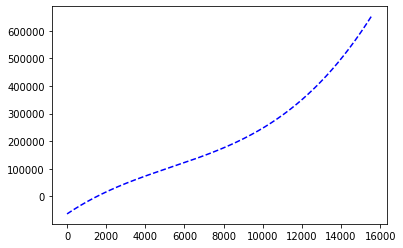

In [55]:
y0=model.predict(x)
plt.plot(y0,'--b')
plt.show()

# Prediction

In [56]:
days=5
print('-'*30);print('PREDICTION');print('-'*30)
print(f'Prediction-cases after {days} days :',end='')
print(round(int(model.predict(polyFeat.fit_transform([[234+days]])))))
plt.show()

------------------------------
PREDICTION
------------------------------
Prediction-cases after 5 days :-52255


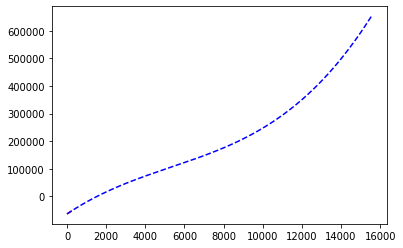

In [57]:
x1=np.array(list(range(1,234+days))).reshape(-1,1)
y1=model.predict(polyFeat.fit_transform(x1))
plt.plot(y1,'--r')
plt.plot(y0,'--b')
plt.show()